# Multidimensional S Curve

### Génération et Affichage des données 

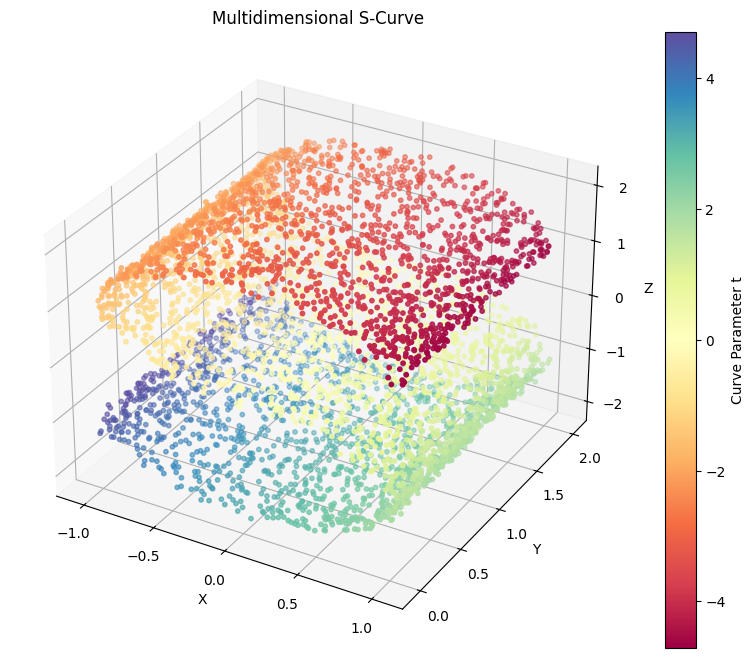

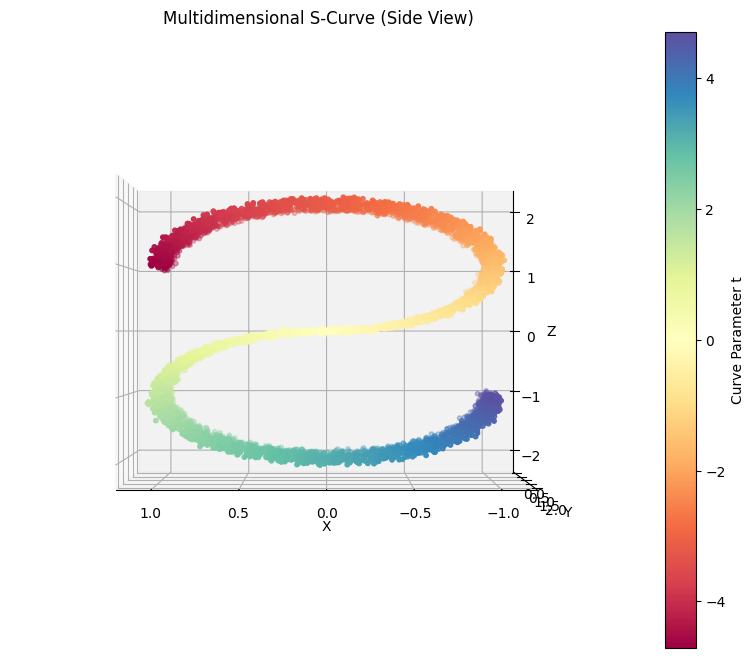

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_s_curve

def generate_s_curve(n_samples=1000, noise=0.0, random_state=None):
    """
    Génère une courbe en S dans un espace tridimensionnel avec sklearn.datasets.make_s_curve.

    Paramètres :
        n_samples (int) : Nombre d'échantillons à générer.
        noise (float) : Niveau de bruit ajouté aux points.
        random_state (int, optionnel) : Graine pour le générateur aléatoire.

    Retourne :
        tuple : (points, couleurs) où points est un tableau (n_samples, 3) contenant les coordonnées des points,
                et couleurs est un tableau (n_samples,) représentant les positions des points sur la courbe.
    """
    points, t = make_s_curve(n_samples=n_samples, noise=noise, random_state=random_state)
    return points, t

# Génération de la courbe en S
n_samples = 5000
noise = 0.02
random_state = 42

points, colors = generate_s_curve(n_samples=n_samples, noise=noise, random_state=random_state)

# Visualisation principale
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=colors, cmap='Spectral', s=10)  # Taille des points augmentée
ax.set_title("Multidimensional S-Curve")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.colorbar(sc, label="Curve Parameter t")
plt.show()

# Visualisation sous un autre angle
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=colors, cmap='Spectral', s=10)  # Taille des points augmentée
ax.set_title("Multidimensional S-Curve (Side View)")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.view_init(elev=0, azim=90)  # Vue de côté
plt.colorbar(sc, label="Curve Parameter t")
plt.show()


### Affichages des différentes ACP en 3D

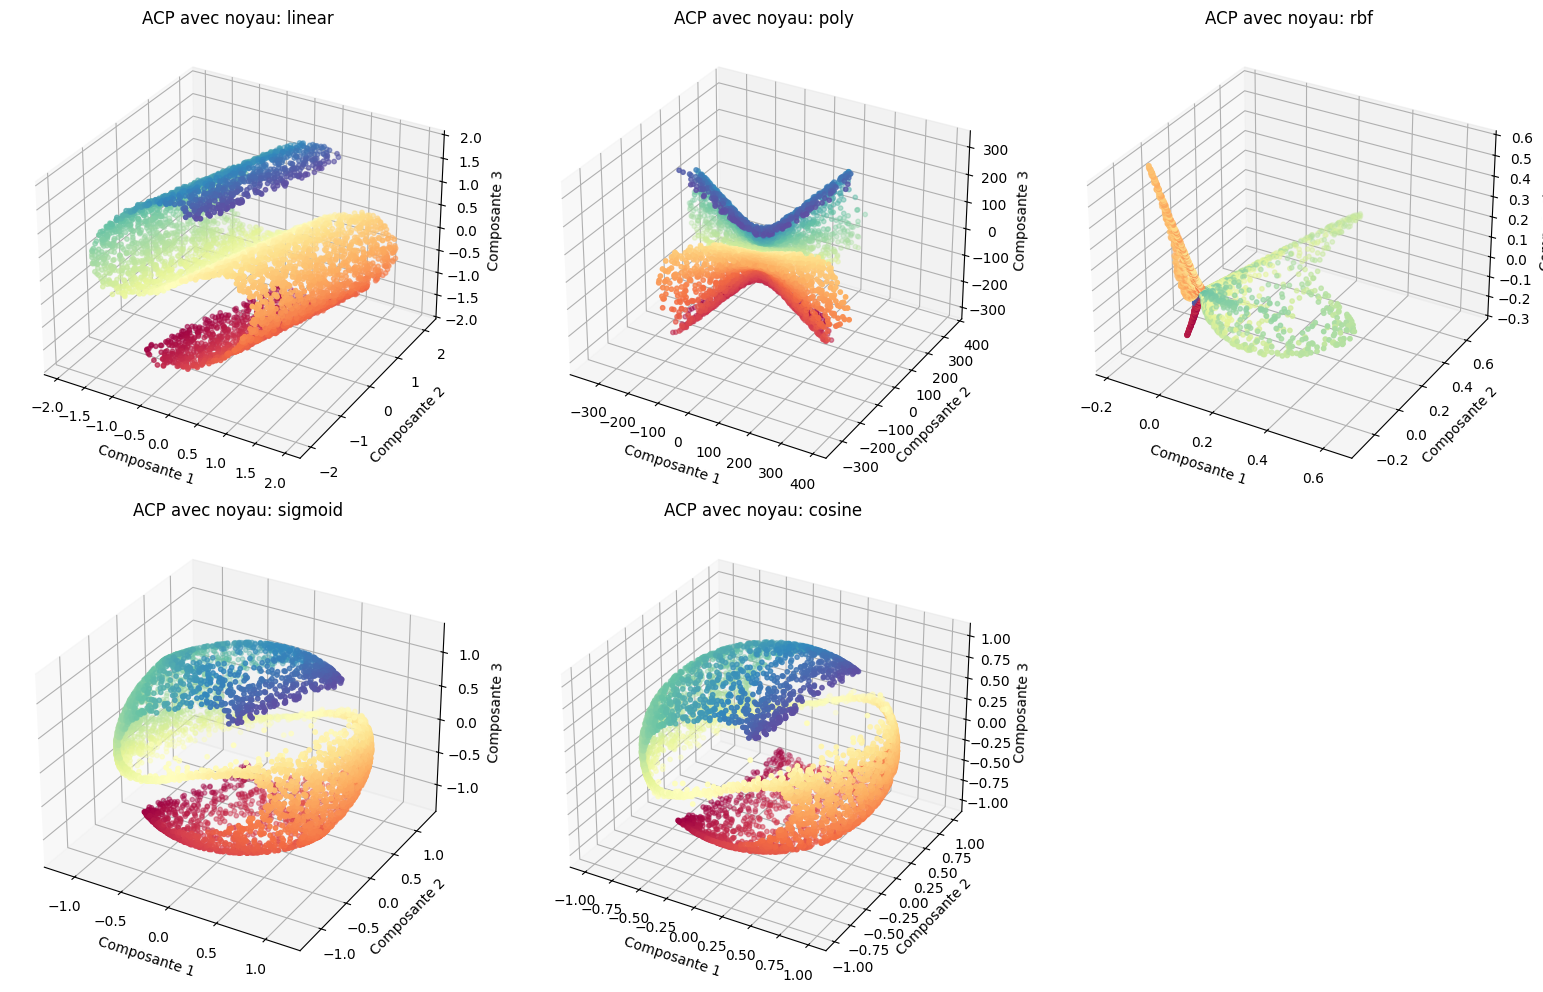

In [2]:
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler

# Standardisation des données
scaler = StandardScaler()
points_scaled = scaler.fit_transform(points)

# Liste des noyaux à tester
kernels = ['linear', 'poly', 'rbf', 'sigmoid', 'cosine']
results = {}

# Application de l'ACP avec noyaux pour chaque noyau
for kernel in kernels:
    try:
        kpca = KernelPCA(n_components=3, kernel=kernel, gamma=10)
        points_kpca = kpca.fit_transform(points_scaled)
        results[kernel] = points_kpca
    except Exception as e:
        print(f"Erreur avec le noyau {kernel}: {e}")

# Visualisation des résultats
fig = plt.figure(figsize=(16, 10))

for i, kernel in enumerate(results.keys()):
    ax = fig.add_subplot(2, 3, i + 1, projection='3d')
    points_kpca = results[kernel]
    ax.scatter(points_kpca[:, 0], points_kpca[:, 1], points_kpca[:, 2], c=colors, cmap='Spectral', s=10)
    ax.set_title(f"ACP avec noyau: {kernel}")
    ax.set_xlabel("Composante 1")
    ax.set_ylabel("Composante 2")
    ax.set_zlabel("Composante 3")

plt.tight_layout()
plt.savefig("kernel_pca_comparison.png")
plt.show()

### Etudes des pairwises distances 

In [4]:
from sklearn.metrics import pairwise_distances

# Initialisation du dictionnaire pour les différences des distances pairwise
distance_differences = {}

# Fonction pour calculer la différence des matrices de distances entre paires
def pairwise_distance_difference(original, transformed):
    original_distances = pairwise_distances(original)
    transformed_distances = pairwise_distances(transformed)
    difference = np.linalg.norm(original_distances - transformed_distances) / np.linalg.norm(original_distances)
    return difference

# Application de l'ACP avec noyaux pour chaque noyau avec ajustement des paramètres
for kernel in kernels:
    try:
        if kernel == 'poly':
            kpca = KernelPCA(n_components=3, kernel=kernel, gamma=1, degree=2, coef0=1, fit_inverse_transform=True)
        elif kernel == 'sigmoid':
            kpca = KernelPCA(n_components=3, kernel=kernel, gamma=0.1, coef0=1, fit_inverse_transform=True)
        else:
            kpca = KernelPCA(n_components=3, kernel=kernel, gamma=10, fit_inverse_transform=True)
        
        points_kpca = kpca.fit_transform(points_scaled)
        results[kernel] = points_kpca
        distance_differences[kernel] = pairwise_distance_difference(points_scaled, points_kpca)
    except Exception as e:
        print(f"Erreur avec le noyau {kernel}: {e}")
        distance_differences[kernel] = np.inf

# Affichage des différences de distances entre paires
print("\nDifférences relatives des matrices de distances (pairwise distances) pour chaque noyau:")
for kernel, difference in distance_differences.items():
    print(f"{kernel}: {difference}")



Différences relatives des matrices de distances (pairwise distances) pour chaque noyau:
linear: 3.4398769784438863e-16
poly: 0.5999895507023906
rbf: 0.9342013580871206
sigmoid: 0.7931846611391664
cosine: 0.43968042461508355
